In [1]:
import os 
os.chdir('../')

import sys
sys.path.append('scr/')

In [2]:
from itertools import chain
import re

import pandas as pd
import numpy as np
import http
import time
import json

from functools import reduce
from datetime import datetime
from bs4 import BeautifulSoup
from tqdm import tqdm
from datetime import date, datetime

from urllib.error import HTTPError
from urllib.request import Request, urlopen

from basix import parquet

USER_AGENT = "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36"

BASE_URL = "https://www.icarros.com.br/ache/listaanuncios.jsp?bid=1&pag={page}&lis=0&ord=24&sop=sta_1.1_-cid_3632.1_-esc_2.1_-rai_0.1_"

N_BY_PAGE = 20

SLEEP_TIME_MEAN = 7
SLEEP_TIME_STD = 5
SLEEP_TIME_BIAS = 7

OUTPUT_PATH = 'data/raw/scrapped/'

In [3]:
df = pd.read_parquet(OUTPUT_PATH)
df['price'] = df['price'].astype(float)

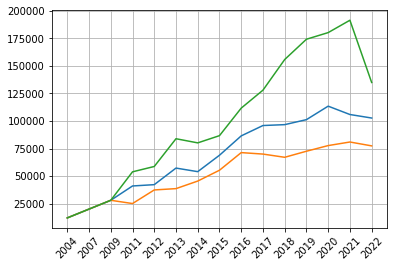

In [11]:
import matplotlib.pyplot as plt

temp = df.groupby('Ano').agg(
    p16 = ('price', lambda x: np.quantile(x, 0.16)),
    p50 = ('price', lambda x: np.quantile(x, 0.50)),
    p84 = ('price', lambda x: np.quantile(x, 0.84)),
).reset_index()


plt.plot(temp['Ano'], temp['p50'])
plt.plot(temp['Ano'], temp['p16'])
plt.plot(temp['Ano'], temp['p84'])
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(temp[['Ano']],temp['p50'])

In [10]:
model.coef_ / 365

array([17.34536753])